<a href="https://colab.research.google.com/github/RudraKhare/DeepLearning/blob/main/Credit_Card_Customer_Churn_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import numpy as np
import pandas as pd




In [121]:
df=pd.read_csv("/content/Churn_Modelling.csv")

In [122]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [124]:
df.duplicated().sum()

0

In [125]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [126]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [127]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace = True)

In [128]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [129]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True) #drop_first=True is important to use, as it helps in reducing the extra column created during dummy variable creation.


In [130]:
X = df.drop(columns=['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [131]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [132]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [133]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [148]:
model = Sequential()
model.add(Dense(3,activation='relu',input_dim=11)) #hiddenlayer
model.add(Dense(1,activation='relu'))


In [135]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 3)                 36        
                                                                 
 dense_10 (Dense)            (None, 1)                 4         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [186]:
#COMPILE STAGE- INPUTS About lossfuntion,Optimizer
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])


In [187]:
#history=model.fit(X_train_scaled,y_train,epochs=20,validation_split=0.2)
history = model.fit(X_train_scaled,y_train,batch_size=50,epochs=50,verbose=1,validation_split=0.3)


Epoch 1/50
112/112 [==============================] - 1s 4ms/step - loss: 3.1401 - accuracy: 0.7964 - val_loss: 3.0978 - val_accuracy: 0.7992
Epoch 2/50
112/112 [==============================] - 0s 2ms/step - loss: 3.1401 - accuracy: 0.7964 - val_loss: 3.0978 - val_accuracy: 0.7992
Epoch 3/50
112/112 [==============================] - 0s 2ms/step - loss: 3.1401 - accuracy: 0.7964 - val_loss: 3.0978 - val_accuracy: 0.7992
Epoch 4/50
112/112 [==============================] - 0s 2ms/step - loss: 3.1401 - accuracy: 0.7964 - val_loss: 3.0978 - val_accuracy: 0.7992
Epoch 5/50
112/112 [==============================] - 0s 2ms/step - loss: 3.1401 - accuracy: 0.7964 - val_loss: 3.0978 - val_accuracy: 0.7992
Epoch 6/50
112/112 [==============================] - 0s 3ms/step - loss: 3.1401 - accuracy: 0.7964 - val_loss: 3.0978 - val_accuracy: 0.7992
Epoch 7/50
112/112 [==============================] - 0s 4ms/step - loss: 3.1401 - accuracy: 0.7964 - val_loss: 3.0978 - val_accuracy: 0.7992
Epoch 

In [188]:
_+model.layers[0].get_weights()
#Those 36 weights nad 3 bias from coming as input to hidden layer

 array([[-0.3341195 , -0.16143098, -0.51687247],
        [-0.30830923,  0.00799811, -0.3840528 ],
        [ 0.5639913 , -0.05686051,  0.0632655 ],
        [-0.36221012,  0.6497135 ,  0.38796437],
        [-0.4701568 ,  0.14216518,  0.4256208 ],
        [ 0.60469854, -0.5463402 , -0.33186835],
        [-0.03561628, -0.39029452, -0.46040905],
        [ 0.03958011, -0.29634246,  0.5539813 ],
        [-0.30451068,  0.03738981,  0.4537462 ],
        [ 0.14926112, -0.5189479 ,  0.5149919 ],
        [ 0.24281943,  0.22968608, -0.23919302]], dtype=float32),
 array([0., 0., 0.], dtype=float32)]

In [189]:
#Those 3 weights and and 1bias to output layer
model.layers[1].get_weights()

[array([[-1.1653476 ],
        [-0.94635785],
        [-0.8645494 ]], dtype=float32),
 array([0.], dtype=float32)]

In [190]:
model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [191]:
y_log=model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [192]:
y_pred=np.where(y_log>0.5,1,0)

In [193]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7925

In [194]:
import matplotlib.pyplot as plt

In [195]:
history.history


{'loss': [3.140078544616699,
  3.140078544616699,
  3.1400794982910156,
  3.1400792598724365,
  3.140077829360962,
  3.140078067779541,
  3.140078067779541,
  3.140078544616699,
  3.140078544616699,
  3.1400773525238037,
  3.140078544616699,
  3.140078067779541,
  3.140078067779541,
  3.1400792598724365,
  3.1400787830352783,
  3.140078067779541,
  3.140078544616699,
  3.140078544616699,
  3.140078067779541,
  3.1400773525238037,
  3.1400787830352783,
  3.1400792598724365,
  3.140078067779541,
  3.1400787830352783,
  3.140078544616699,
  3.140077829360962,
  3.1400787830352783,
  3.140078067779541,
  3.140078067779541,
  3.140077829360962,
  3.140078544616699,
  3.140078067779541,
  3.140078067779541,
  3.140077829360962,
  3.140078544616699,
  3.140078544616699,
  3.140078544616699,
  3.140078544616699,
  3.140078544616699,
  3.140077829360962,
  3.140078544616699,
  3.1400792598724365,
  3.1400787830352783,
  3.1400787830352783,
  3.140077829360962,
  3.140078544616699,
  3.140078067

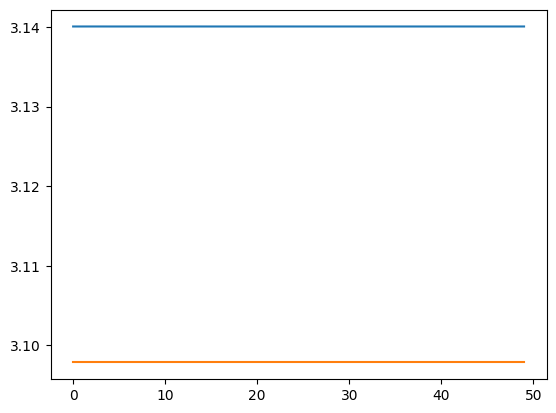

In [196]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

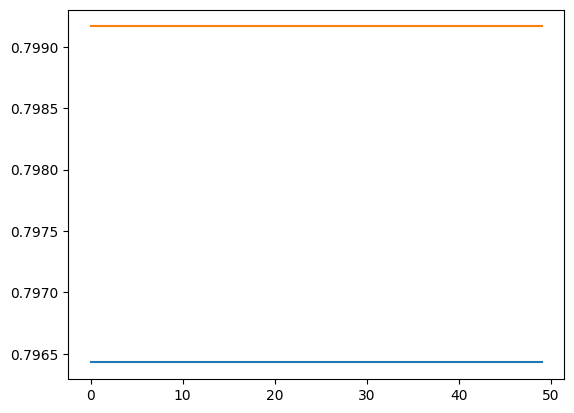

In [197]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])